# Code estimating the constrain on the $d_g^*$ parameter

Author: Francesco Cipriano

In the last decades a new model for the dark matter (DM) has been proposed in which the DM is described by an ultra-light scalar field $\phi$. The spatial variations of such field is able to exert position-dependent oscillatory force on gravitational waves detectors' optical equipment. As a result, the optical equipment undergoes position-dependent oscillatory motions, which ends up with the non-vanishing signals in the GW detectors' outputs 

$$
\begin{split}
h\left(\vec{x}, t\right) &=h_1\cos\left(\omega_0 t-\vec{k}_{DM}\cdot\vec{x}-\delta\right)+h_2\sin\left(\omega_0 t-\vec{k}_{DM}\cdot\vec{x}-\delta\right)\\
&= \dfrac{\sqrt{8\pi G}}{c^3\omega_0}d^*_g\left[\sqrt{\rho_s}\left(\vec{v}_s\cdot\vec{d}\right)\left(\vec{v}_s\cdot\vec{a}\right)+\sqrt{\rho_h}\left(\vec{v}_h\cdot\vec{d}\right)\left(\vec{v}_h\cdot\vec{a}\right)\right]\cos\left(\omega_0 t-\vec{k}_{DM}\cdot\vec{x}-\delta\right)\\
&-\dfrac{\sqrt{8\pi G}}{c^3}\dfrac{L}{2}d^*_g\left[\sqrt{\rho_s}\left(\vec{v}_s\cdot\vec{d}\right)+\sqrt{\rho_h}\left(\vec{v}_h\cdot\vec{d}\right)\right]\sin\left(\omega_0 t-\vec{k}_{DM}\cdot\vec{x}-\delta\right),
\end{split}
$$

where $d_g^*$ is the coupling constant between the scalar field and gluons. The quantites $\rho_s$ and $\rho_h$, $\vec{v}_s$ and $\vec{v}_h$ are parameters related to the dark matter model considered whereas $L$, $\vec{d}$ and $\vec{a}$ encode the geometrical characteristics of the detector. <br>

In the following code  we will evaluate the amplitude of this signal and derive an order-of-magnitude estimation of the constrain one can put on the parameter $d_g^*$ in case of no detection.

# Packages
List of the packages we are gonna need

In [1]:
import numpy as np
from numpy import sin, cos, arcsin, arccos, arctan, sqrt
from scipy import integrate, special, constants, stats
import matplotlib.pyplot as plt

# Constants
List of physical constants with their dimensions

In [2]:
pi = np.pi 
c = constants.c # speed of light in vacuum (m s{-1})
G = constants.G # Newtonian constant of gravitation (m^3 kg^{-1} s^{-2})
e = constants.e # elementary charge (kg m^{2} s^{-2})
h_bar = 6.582119569*1e-16 # the Planck constant h divived by pi (eV s)
T_e = 24*60*60 # Diurnal Earth revolution time (s)

# Detectors' parameters
In this section of the code we store all the information on the interferometer one needs to evaluate the amplitude of the signal and the magnitude of the constraint on $d_g^*$. <br>

------------------------------------------------------------------------------------------------------------------

In particular, the classes $\textbf{LHO}$ and $\textbf{LLO}$ contain the following interferometers informations:

Position $vertex$;<br>
Arms' orientation $arm_x$ and $arm_y$<br>
Arms' lenght $L$<br>

 

In [3]:
# LIGO Hanford Observatory 4km Interferometric Detector
class LHO:
    LAL_LHO_4K_VERTEX_LOCATION_X_SI = 707.41e+03 # LHO_4k x-component of vertex location in Earth-centered frame (m)
    LAL_LHO_4K_VERTEX_LOCATION_Y_SI = -4329.11e+03 # LHO_4k y-component of vertex location in Earth-centered frame (m)
    LAL_LHO_4K_VERTEX_LOCATION_Z_SI = 4614.74e+03 # LHO_4k z-component of vertex location in Earth-centered frame (m)

    vertex = [LAL_LHO_4K_VERTEX_LOCATION_X_SI, LAL_LHO_4K_VERTEX_LOCATION_Y_SI, LAL_LHO_4K_VERTEX_LOCATION_Z_SI]

    LAL_LHO_4K_ARM_X_DIRECTION_X = -0.684779 # LHO_4k x-component of unit vector pointing along x arm in Earth-centered frame
    LAL_LHO_4K_ARM_X_DIRECTION_Y = 0.476172 # LHO_4k y-component of unit vector pointing along x arm in Earth-centered frame
    LAL_LHO_4K_ARM_X_DIRECTION_Z = 0.55167 # LHO_4k z-component of unit vector pointing along x arm in Earth-centered frame

    arm_x = [LAL_LHO_4K_ARM_X_DIRECTION_X, LAL_LHO_4K_ARM_X_DIRECTION_Y, LAL_LHO_4K_ARM_X_DIRECTION_Z]

    LAL_LHO_4K_ARM_Y_DIRECTION_X = -0.720231 # LHO_4k x-component of unit vector pointing along y arm in Earth-centered frame
    LAL_LHO_4K_ARM_Y_DIRECTION_Y = -0.557622 # LHO_4k y-component of unit vector pointing along y arm in Earth-centered frame
    LAL_LHO_4K_ARM_Y_DIRECTION_Z = -0.412703 # LHO_4k z-component of unit vector pointing along y arm in Earth-centered frame

    arm_y = [LAL_LHO_4K_ARM_Y_DIRECTION_X, LAL_LHO_4K_ARM_Y_DIRECTION_Y, LAL_LHO_4K_ARM_Y_DIRECTION_Z]

    L = 4e3 # length of the interferometer arms (m)

    
    
# LIGO Livingston Observatory 4km Interferometric Detector
class LLO:
    LAL_LLO_4K_VERTEX_LOCATION_X_SI = 3371.80e+03 # LLO_4k x-component of vertex location in Earth-centered frame (m)
    LAL_LLO_4K_VERTEX_LOCATION_Y_SI = -4329.11e+03 # LLO_4k y-component of vertex location in Earth-centered frame (m)
    LAL_LLO_4K_VERTEX_LOCATION_Z_SI = -0.266085e+03 # LLO_4k z-component of vertex location in Earth-centered frame (m)

    vertex = [LAL_LLO_4K_VERTEX_LOCATION_X_SI, LAL_LLO_4K_VERTEX_LOCATION_Y_SI, LAL_LLO_4K_VERTEX_LOCATION_Z_SI]

    LAL_LLO_4K_ARM_X_DIRECTION_X = -0.65377 # LLO_4k x-component of unit vector pointing along x arm in Earth-centered frame
    LAL_LLO_4K_ARM_X_DIRECTION_Y = -0.708366 # LLO_4k y-component of unit vector pointing along x arm in Earth-centered frame
    LAL_LLO_4K_ARM_X_DIRECTION_Z = -0.266085 # LLO_4k z-component of unit vector pointing along x arm in Earth-centered frame

    arm_x = [LAL_LLO_4K_ARM_X_DIRECTION_X, LAL_LLO_4K_ARM_X_DIRECTION_Y, LAL_LLO_4K_ARM_X_DIRECTION_Z]

    LAL_LLO_4K_ARM_Y_DIRECTION_X = 0.540953 # LLO_4k x-component of unit vector pointing along y arm in Earth-centered frame
    LAL_LLO_4K_ARM_Y_DIRECTION_Y = -0.191642 # LLO_4k y-component of unit vector pointing along y arm in Earth-centered frame
    LAL_LLO_4K_ARM_Y_DIRECTION_Z = -0.81893 # LLO_4k z-component of unit vector pointing along y arm in Earth-centered frame

    arm_y = [LAL_LLO_4K_ARM_Y_DIRECTION_X, LAL_LLO_4K_ARM_Y_DIRECTION_Y, LAL_LLO_4K_ARM_Y_DIRECTION_Z]

    L = 4e3 # length of the interferometer arms (m) 

The list $\textit{temp}$ contains tuples of two elements $(f, sn)$. 

The first element, $f$, is a frequency. The second element, $sn$,  is the square-root of the interferometer one-sided noise spectral density corresponding to that frequency.

In [4]:
#--------------------------------------------------------------------------------------------------

wkf='LHO3.txt' #LIGO sensitivity curves https://dcc.ligo.org/LIGO-T2000012/public
f_h3,sn_h3=np.loadtxt(wkf, usecols=(0,1),unpack=True)
temp_h3 = list(zip(f_h3, sn_h3))
step_h3 = 1 # step used to scan the values in "temp"

f = f_h3
sn = sn_h3

temp = temp_h3
step = step_h3

# Dark matter parameters (Galactic frame)

In this part of the code we describe the dark matter model we used in order to evaluate the quantities $\vec{v}_s$ and $\vec{v}_h$ that figure in the signal magnitude formula.

------------------------------------------------------------------------------------------------------------------

We assume a local dark matter energy density value of 

$\rho_{\phi}= 0.5GeV/m^3$.<br>

We also assume such energy density be divided according to the following percentages into the Halo and the S1 stream. 

$\rho_h = 90\%\rho_{\phi}$ and $\rho_s = 10\%\rho_{\phi}$.<br>

In [5]:
# ENERGY DENSITY

rho_phi = 0.5*e*1e9*1e6 # Dark matter local energy density (eV/m^3)
rho_h = 0.9*rho_phi # Halo energy density
rho_s = 0.1*rho_phi # Stream energy density

We describe both components of the local dark matter through a Maxwellian distribution boosted by some velocity. For the halo we used as boost the laboratory velocity obtaining 
$$
f_{h}\left(\vec{v}\right) \simeq \dfrac{1}{\left(2\pi \sigma_{h}^2\right)^{3/2}}\exp\left(-\dfrac{|\vec{v}-\vec{v}_{lab}|^2}{2\sigma_{h}^2}\right)
$$

Where $\sqrt{2}\sigma_{h} = v_0 = 232.8 km/s$. The stream component con be described in the same way by replacing $\sigma_{h}$ with $\sigma_{s}$ and $\vec{v}_{lab}$ with $\vec{v}_{lab}-\vec{v}_{str}$. We obtain therefore

$$
f_{s}\left(\vec{v}\right) \simeq \dfrac{1}{\left(2\pi \sigma_{s}^2\right)^{3/2}}\exp\left(-\dfrac{|\vec{v}-\vec{v}_{lab}+\vec{v}_{str}|^2}{2\sigma_{s}^2}\right)
$$,<br>
with $\sigma_s \simeq 46 km/s$.<br><br>
The laboratory velocity in the Galactic (cartesian) reference system is

$\vec{v}_{lab} = \left(11.1, 245.04, 7.25\right)$km/s,<br>

whereas in the same system the S1 stream velocity is

$\vec{v}_{str} = \left(8.6, -286.7, -67.9\right)$km/s.

In [6]:
# VELOCITIES

v_lab = [11.1, 245.04, 7.25] # (km/s)
v_lab_si =  [i*1000 for i in v_lab] # (m/s)

v_stream = [8.6, -286.7, -67.9] # (km/s)
v_stream_si =  [i*1000 for i in v_stream] # (m/s)

To be able to evaluate the signal magnitude one defines the quantities

$$\vec{v}_h = \left\langle f_{h}\left(\vec{v}\right) \right\rangle = \left(-11.1, -245.04, -7.25\right)km/s,
$$
and<br>
$$
\vec{v}_s = \left\langle f_{s}\left(\vec{v}\right) \right\rangle = \left(-2.5, -531.74, -75.15\right)km/s.
$$

In [7]:
v_halo_gal = [-i for i in v_lab_si] # v_h in the galactic cartesian coordinates frame (m/s)
v_stream_gal = np.subtract(v_stream_si, v_lab_si) # v_s in the galactic cartesian coordinates frame (m/s)

## Conversion to laboratory frame
In this section we convert $\vec{v}_s$ and $\vec{v}_h$ from galactic cartesian coordinate frame to equatorial cartesian coordinate frame.

------------------------------------------------------------------------------------------------------------------

The function $\textbf{deg_to_rad}$ transform degree to radiant.<br>


In [8]:
def deg_to_rad(deg):
    r = deg*2*pi/360
    return r

The function $\textbf{atan2}$ gives the angle (radiant) between the positive axis and the ray to the point $(x,y)\neq(0,0)$.<br>


In [9]:
def atan2(x, y):
    if x>0: r = arctan(y/x)
    elif x<0 and y>=0: 
        r = arctan(y/x)+pi
    elif x<0 and y<0: 
        r = arctan(y/x)-pi
    elif (x==0 and y>0): 
        r = pi/2
    elif (x==0 and y<0): 
        r = -pi/2
    elif (x==0 and y==0): 
        r = None
    
    return r

The function $\textbf{cartesian_to_spherical}$ is used to switch from cartesian to spherical coordinates.<br>
The function $\textbf{spherical_to_cartesian}$ is used to switch from spherical to cartesian coordinates.<br>


In [10]:
def cartesian_to_spherical(cartesian):
    
    r = sqrt(cartesian[0]**2+cartesian[1]**2+cartesian[2]**2)
    theta = arccos(cartesian[2]/r)
    phi = atan2(cartesian[0],cartesian[1])
    
    return r, theta, phi


def spherical_to_cartesian(spherical):
    x = spherical[0]*sin(spherical[1])*cos(spherical[2])
    y = spherical[0]*sin(spherical[1])*sin(spherical[2])
    z = spherical[0]*cos(spherical[1])
    
    return x, y, z

The function $\textbf{galactic_to_equatorial}$ is used to switch from galactic spherical coordinate to equatorial spherical coordinate following the coordinates trnsformation<br><br>
$$
\begin{split}
\sin\delta& = \sin\delta_G\sin b+\cos\delta_G\cos b\cos\left(122^{\circ}.9-l\right)\\
\cos\delta\sin\left(\alpha-\alpha_G\right)& = \cos b\sin\left(122^{\circ}.9-l\right)\\
\cos\delta\cos\left(\alpha-\alpha_G\right)& = \cos\delta_G\sin b-\sin\delta_G\cos b\cos\left(122^{\circ}.9-l\right).
\end{split}
$$<br><br>


In [11]:
def galactic_to_equatorial(galactic):
    
    alpha_G_deg = 192.85 # North Galactic pole right ascension
    alpha_G = deg_to_rad(alpha_G_deg) # rad

    delta_G_deg = 27.13 # North Galactic pole declination
    delta_G = deg_to_rad(delta_G_deg) # rad

    
    delta = arcsin(sin(delta_G)*sin(pi/2-galactic[1])+cos(delta_G)*cos(pi/2-galactic[1])*cos(deg_to_rad(122.9)-galactic[2]))
    alpha = arcsin(cos(pi/2-galactic[1])*sin(deg_to_rad(122.9)-galactic[2])/cos(delta))+ alpha_G
    
    r = galactic[0]
    theta = pi/2-delta # the term pi/2 is nedeed in order to accord theta to the spherical coord definition
    phi = alpha
    
    
    
    return r, theta, phi

The function $\textbf{galactic_to_equatorial_cartesian}$ makes use of the previus three functions to to switch from galactic cartesian coordinate to equatorial cartesian coordinate.

In [12]:
def galactic_to_equatorial_cartesian(vector_galactic_cartesian):
    vector_gal_sphe = cartesian_to_spherical(vector_galactic_cartesian)
    vector_eq_sphe = galactic_to_equatorial(vector_gal_sphe)
    vector_eq_cart = spherical_to_cartesian(vector_eq_sphe)
    
    return vector_eq_cart

We applay the function $\textbf{galactic_to_equatorial_cartesian}$ to $\vec{v}_h$ and $\vec{v}_s$ to obtain their components in the equatorial cartesian coordinate frame.

In [13]:
# MEAN VELOCITIES IN THE LAB FRAME FOR THE HALO AND STRESM COMPONENTS

v_h = galactic_to_equatorial_cartesian(v_halo_gal) # v_h in the equatorial cartesian coordinates frame (m/s)
v_s = galactic_to_equatorial_cartesian(v_stream_gal) # v_s in the equatorial cartesian coordinates frame (m/s)

# Signal ampliude

We evaluate the amplitude of the signal once we cast it in the form <br>
$$
h\left(\vec{x}, t\right) = h\cos\left(\omega_0 t-\vec{k}_{DM}\cdot\vec{x}-\delta+\varphi\right),
$$
with
$$
\begin{split}
h &= \dfrac{\sqrt{8\pi G}}{c^3}\left[\dfrac{\left[\sqrt{\rho_s}\left(\vec{v}_s\cdot\vec{d}\right)\left(\vec{v}_s\cdot\vec{a}\right)+\sqrt{\rho_h}\left(\vec{v}_h\cdot\vec{d}\right)\left(\vec{v}_h\cdot\vec{a}\right)\right]^2}{\omega_0^2}+\dfrac{L^2\left[\sqrt{\rho_s}\left(\vec{v}_s\cdot\vec{d}\right)+\sqrt{\rho_h}\left(\vec{v}_h\cdot\vec{d}\right)\right]^2}{4}\right]^{1/2}d^*_g,\\
\varphi &= atan2\left(-\dfrac{\sqrt{8\pi G}}{c^3}d^*_g\dfrac{L}{2}\left[\sqrt{\rho_s}\left(\vec{v}_s\cdot\vec{d}\right)+\sqrt{\rho_h}\left(\vec{v}_h\cdot\vec{d}\right)\right], \dfrac{\sqrt{8\pi G}}{c^3\omega_0}d^*_g \left[\sqrt{\rho_s}\left(\vec{v}_s\cdot\vec{d}\right)\left(\vec{v}_s\cdot\vec{a}\right)+\sqrt{\rho_h}\left(\vec{v}_h\cdot\vec{d}\right)\left(\vec{v}_h\cdot\vec{a}\right)\right] \right).
\end{split}
$$

In [14]:
# SIGNAL MODULATATIONS PARAMETERS

f_1 = 1 # switch to turn on/off the h1 contribute
f_2 = 1 # switch to turn on/off the h2 contribute

The function  $\textbf{scalar_d}$ evaluates the quantity $\vec{v}\cdot\vec{d}$, with $\vec{d}=arm_x-arm_y$.<br>
The function  $\textbf{scalar_a}$ evaluates the quantity $\vec{v}\cdot\vec{a}$, with $\vec{a}=arm_x+arm_y$.<br>

In [15]:
def scalar_d(t, v_dm, detector):
    
    l = np.subtract(detector.arm_x, detector.arm_y)
    r = v_dm[2]*l[2]+(v_dm[0]*l[0]+v_dm[1]*l[1])*cos(2*pi*t/T_e)+(v_dm[1]*l[0]-v_dm[0]*l[1])*sin(2*pi*t/T_e)
    
    return r


def scalar_a(t, v_dm, detector):
    
    l = np.add(detector.arm_x, detector.arm_y)
    r = v_dm[2]*l[2]+(v_dm[0]*l[0]+v_dm[1]*l[1])*cos(2*pi*t/T_e)+(v_dm[1]*l[0]-v_dm[0]*l[1])*sin(2*pi*t/T_e)
    
    return r

The function  $\textbf{G1}$ evaluates the quantity $G_1$ defined by <br>

$$
G_1=\left[\sqrt{\rho_s}\left(\vec{v}_s\cdot\vec{d}\right)\left(\vec{v}_s\cdot\vec{a}\right)+\sqrt{\rho_h}\left(\vec{v}_h\cdot\vec{d}\right)\left(\vec{v}_h\cdot\vec{a}\right)\right]^2.
$$

In [16]:
def G1(t, detector):
    r = sqrt(rho_s)*scalar_d(t, v_s, detector)*scalar_a(t, v_s, detector)+sqrt(rho_h)*scalar_d(t, v_h, detector)*scalar_a(t, v_h, detector)

    return f_1*r**2

The function  $\textbf{G2}$ evaluates the quantity $G_2$ defined by <br>

$$
G_2=\left[\sqrt{\rho_s}\left(\vec{v}_s\cdot\vec{d}\right)+\sqrt{\rho_h}\left(\vec{v}_h\cdot\vec{d}\right)\right]^2.
$$

In [17]:
def G2(t, detector):
    r = sqrt(rho_s)*scalar_d(t, v_s, detector)+sqrt(rho_h)*scalar_d(t, v_h, detector)
    
    return f_2*r**2

Because the quantities $\vec{v}\cdot\vec{d}$ and $\vec{v}\cdot\vec{a}$ dependes on the interferometer orientation, we need to average them with respect to the Earth diurnal motion.<br>
The function  $\textbf{time_average}$ evaluates the time average of the argument following the definition <br>

$$
\bar{A} = \dfrac{1}{T_E}\int_0^{T_E}Adt.
$$

In [18]:
def time_average(f, a):
   
    I = integrate.quad(f, 0., T_e,args=(a,))
    return I[0]/T_e

The function  $\textbf{G1_mean}$ evaluates the time average of the quantity $G_1$.<br>
The function  $\textbf{G2_mean}$ evaluates the time average of the quantity $G_2$.<br>

In [19]:
def G1_mean(detector):
    r = time_average(G1, detector)
    
    return r

def G2_mean(detector):
    r = time_average(G2, detector)
    
    return r


The function  $\textbf{h_bar_squared}$ evaluates the quantity $\bar{h}^2$ defined as follows
$$
\bar{h}^2 = \bar{h}_1^2+\bar{h}_2^2.
$$

In [20]:
def h_bar_squared(frequency, detector):
    k1 = 8*pi*G/(c**6)
    k2 = G1_mean(detector)/((2*pi*frequency)**2)+0.25*G2_mean(detector)*(detector.L**2)
    
    return k1*k2

# Statistical analysis

In this part of the code we derive all the statistical function and parameters we need to evaluate the constrain on $d_g^*$ <br>

$$
d_g^* = \dfrac{\left(e^{\Lambda_*/2}-1-\beta_*\right)^{1/2}}{\Lambda_*^{1/2}}\sqrt{\dfrac{4}{T}}\sqrt{\dfrac{S_{n_{l}}}{\bar{h^2}}}.
$$

------------------------------------------------------------------------------------------------------------------

In order to determine wheter the signal is present or not we use the statistic <br>

$$
\Lambda = \frac{|x_l|^2}{\sigma_l^2}.
$$
In the following line we evaluate all the important quantities related to it.<br>
The function  $\textbf{false_alarm_prob}$ evaluates the false alarm probability $\alpha\left(\Lambda_*\right)$ defined by <br>

$$
\alpha\left(\Lambda_*\right)=\int_{\frac{|x_l|^2}{\sigma_l^2}>\Lambda_*} p\left(x|0\right)dx=e^{-\Lambda_*/2}.
$$

In [21]:
def false_alarm_prob(tau):
    return np.exp(-0.5*tau)

The value of $\Lambda_*$ is foud by maximasing the significance

$$
s = \dfrac{\left\langle m\right\rangle_{h=h_{**}}-\left\langle m\right\rangle_{h=0}}{\sigma}
$$

In [22]:
threshold = 3.18721 # value of Lambda_* used in the code to determine the contraint on d_g^*
alpha = false_alarm_prob(threshold) # the fale alarm probability corresponding to the choice Lambda_* = threshold

The function  $\textbf{false_dismissal_prob}$ evaluates the false dismissal probability $\beta\left(\Lambda_*, h\right)$ <br>

$$
\beta\left(\Lambda_*, h\right)=\int_{\frac{|x_l|^2}{\sigma_l^2}\leq\Lambda_*} p\left(x|h\right)dx=e^{-\frac{N^2h^2}{8\sigma_l^2}}\int_0^{\sqrt{\Lambda_*}}u\,e^{-\frac{1}{2}u^2}I_0\left(\dfrac{Nh}{2\sigma_l}u\right)du.
$$

In [23]:
def false_dismissal_prob(tau, ep):
    
    def g(u, ep):
        r = np.exp(-u)*mod_bessel(ep*np.sqrt(2*u))
        return r
    
    i = integrate.quad(g, 0., 0.5*tau, args = (ep, ))
    
    r = np.exp(-0.5*ep**2)*i[0] 
    
    return r

The function  $\textbf{mod_bessel}$ evaluates the modified Bessel function of the first kind <br>

$$
I_0\left(z\right)=\dfrac{1}{\pi}\int_0^{\pi}d\theta e^{z\cos\theta}.
$$

In [24]:
def mod_bessel(r):
    
    def f(theta, r):
        return np.exp(r*np.cos(theta))
    
    i = integrate.quad(f, 0., np.pi, args = (r, ))
    
    return i[0]/np.pi

The function  $\textbf{false_dismissal_prob_approx}$ evaluates the false dismissal probability $\beta\left(\Lambda_*, h\right)$ approximated for $\left(Nh\right)/2\sigma_l\ll1$ <br>

$$
\beta\left(\Lambda_*, h\right)=1-e^{-\Lambda_*/2}-\dfrac{N^2h^2}{16\sigma_l^2}\Lambda_*e^{-\Lambda_*/2}.
$$


In [25]:
def false_dismissal_prob_approx(tau, ep):
    r = 1-np.exp(-0.5*tau)-0.25*(ep**2)*tau*np.exp(-0.5*tau)
    
    return r

The function  $\textbf{nb_peaks_star_finder}$ finds the number of peaks $m_*$ for which <br>

$$
\textit{CDF}\left[p\left(m, \alpha\right)<m_*\right] = \tilde{C}
$$

In [26]:
def nb_peaks_star_finder(x, nb_sets, prob, threshold1):
    
    nb_peaks_star = np.floor(x)
    nb_peaks_star = 0
    while(stats.binom_test(nb_peaks_star, nb_sets, prob, alternative="greater")> threshold1):
        nb_peaks_star = nb_peaks_star+1
        
    return  nb_peaks_star

The function  $\textbf{beta_threshold_finder}$ finds the value $\beta_*$ for which <br>

$$
\textit{CDF}\left[p\left(m,1- \beta_*\right)<m_*\right] = 0.05.
$$

In [27]:
def beta_threshold_finder(nb_peaks_star, n, threshold2):
    beta_star = 1.
    while(stats.binom_test(nb_peaks_star, n, p= 1 - beta_star, alternative="greater")< threshold2):
        beta_star = beta_star-0.00001
        
    return beta_star

The function  $\textbf{epsilon_squared_star_finder}$ evaluates the quantity $\epsilon_*^2$ defined as follows <br>

$$
\epsilon_*^2=4\dfrac{\left(e^{\Lambda_*/2}-\beta_*e^{\Lambda_*/2}-1\right)}{\Lambda_*}.
$$

In [28]:
def epsilon_squared_star_finder(years_of_observation, tss, threshold1 = 0.05, threshold2 = 0.95):
    n = 60*60*24*365*years_of_observation/tss
    nb_peaks_star = nb_peaks_star_finder(n*alpha, n, alpha, threshold1/(1e4*tss))
    beta_star = beta_threshold_finder(nb_peaks_star, n, threshold2)
    return (4*(1-beta_star)*np.exp(0.5*threshold)-4)/threshold

## Plot false dismissal vs false alarm probability

We plot the false dismissal probability $\beta$ as function of the false alarm probability $\alpha$. We consider $d_g^* = 0.1$ and the frequency of the signal $f \simeq 150$Hz. The value of the threshold $\Lambda_*$ is made to vary along the curve from 0 to 6. The marks correspond to the values $\Lambda_* = 0, 0.5, 1, 1.5,...,6$.

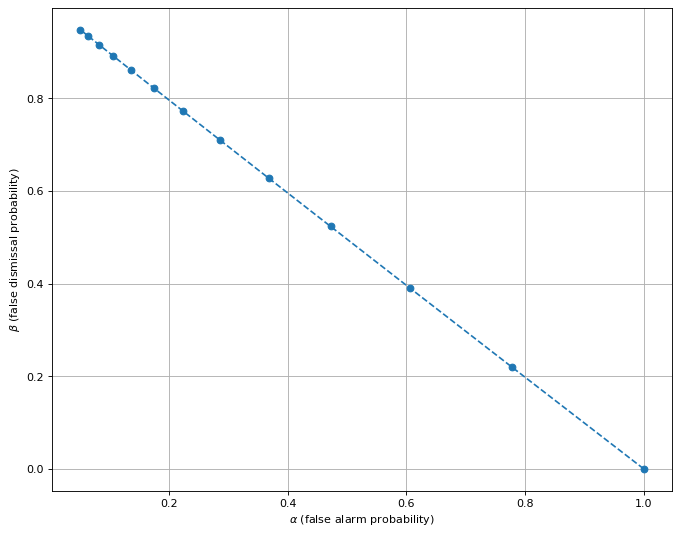

In [29]:
lambda_sample = [0.5 * i for i  in range(13)]
dg_ex = 0.1
f_ex = temp[80*step][0]
sn_ex = temp[80*step][1]
h_ex = sqrt(h_bar_squared(f_ex, LHO))
epsilon_ex = dg_ex*sqrt(30)*sqrt(h_bar_squared(f_ex, LHO))/sn_ex

fig, ax = plt.subplots(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
ax.set(xlabel=r'$\alpha$ (false alarm probability)' , ylabel=r'$\beta$ (false dismissal probability) ',title='')
ax.plot( [false_alarm_prob(l) for l in lambda_sample], [false_dismissal_prob(i, epsilon_ex)for i in lambda_sample], "--", marker='o')
ax.grid()
plt.savefig("./Plots/BetaVsAlpha.png")
plt.show()


#print(f_ex)
#print(h_ex)
#print(sn_ex)
#print(epsilon_ex)


## Plot allowed parameter space region

The plot shows how the constraint $\delta_r\beta < 0.05$ divides the $d_g^*$ parameter space into two region.

In [30]:
epsilon_small = [0.9, 1.3] # for epsilon = 1.3 the relative error on beta is less than 5%, for epsilon = 0.9 is less than 1%.
dg_approx = [[(ep*values[1])/(sqrt(30)*sqrt(h_bar_squared(values[0], LHO)))for values in temp[::step]] for ep in epsilon_small]

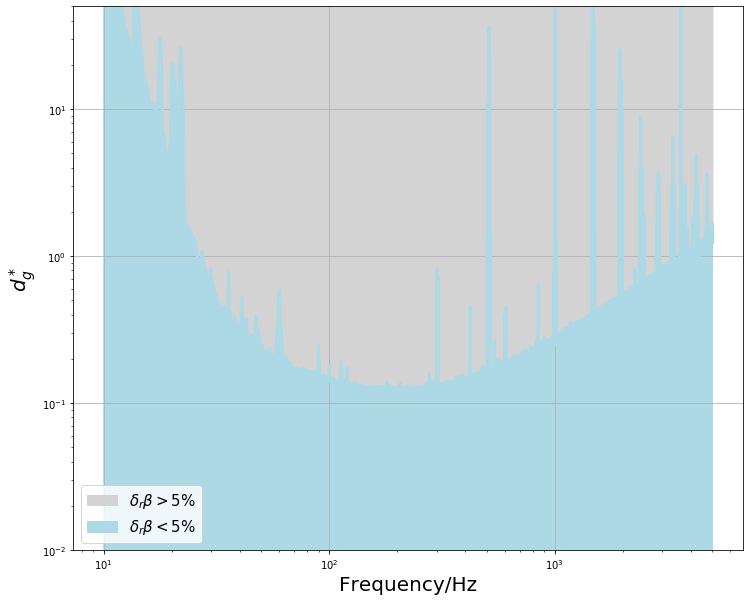

In [63]:
fig, ax = plt.subplots(nrows=1,ncols=1, figsize=(12,10))

#ax.plot(f[::step],dg_approx[0], label=r'$\delta_{rel}\beta<1\%$', linewidth=3.0, color = "steelblue")
ax.plot(f[::step],dg_approx[1], linewidth=3.0, color = "lightblue")
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylim([0.01, 50])
ax.grid(True)
ax.set_xlabel("Frequency/Hz", fontsize = 20)
ax.set_ylabel(r"$d_g^*$", fontsize = 20)
ax.set_facecolor('1.0')


roof = [ 502 for i in f[::step]]
floor = [0.01 for i in f[::step]]
ax.fill_between(f[::step],dg_approx[1], roof, color="lightgray" , label=r'$\delta_{r}\beta>5\%$')
ax.fill_between(f[::step],floor, dg_approx[1],  color="lightblue" , label=r'$\delta_{r}\beta<5\%$')
ax.legend(prop={'size': 15})
plt.show()

# Constraints evaluation

In this section we derives the constraint on $d_g^*$ in case of no detection.

------------------------------------------------------------------------------------------------------------------

We consider an observational campain of two years and a signel search time of 30s.

In [32]:
years_of_observation = 2 # total observational campain span (years)
time_single_search = 30 # time single search (s)

The function $\textbf{constraint}$ evaluates the constraint following the previously mentioned formula <br>

$$
d_g^* = \dfrac{\left(e^{\Lambda_*/2}-1-\beta_*e^{\Lambda_*/2}\right)^{1/2}}{\Lambda_*^{1/2}}\sqrt{\dfrac{4}{T}}\sqrt{\dfrac{S_{n_{l}}}{\bar{h^2}}}.
$$

In [33]:
def constraint(years_of_observation, search_time, detector ):
    epsilon_squared_star = epsilon_squared_star_finder(years_of_observation, search_time)
    r = [i[1]*sqrt(epsilon_squared_star/search_time)/sqrt(h_bar_squared(i[0], detector)) for i in temp[::step]]
    return r

The function $\textbf{constraint_min}$ returns the minimum value of the constraint curve together with its position in the list (and thus the frequency it corresponds to).

In [34]:
def constraint_min(years_of_observation, search_time, detector ):
    epsilon_squared_star = epsilon_squared_star_finder(years_of_observation, search_time)
    constraint = [sqrt(1/search_time)*i[1]*sqrt(epsilon_squared_star)/sqrt(h_bar_squared(i[0], detector)) for i in temp[::step]]
    r = min(constraint)
    t = constraint.index(min(constraint))
    return r, t

The function $\textbf{constraint_min_local}$ evaluates the value of the constraint corresponding to a chosen frequency identified by the argument $bin_index$.

In [35]:
def constraint_min_local(years_of_observation, search_time, detector, bin_index ):
    epsilon_squared_star = epsilon_squared_star_finder(years_of_observation, search_time)
    constraint = temp[bin_index*step][1]*sqrt(epsilon_squared_star/search_time)/sqrt(h_bar_squared(temp[bin_index*step][0], detector))
    return constraint

The function $\textbf{constraint_alternative}$ evaluates the constraint curve following the alternative method based on the relation <br>

$$
s = \dfrac{\left\langle m\right\rangle_{h=h_{**}}-\left\langle m\right\rangle_{h=0}}{\sigma}\geq 1.
$$

In [36]:
def constraint_alternative(years_of_observation, search_time, detector):
    n = 60*60*24*365*years_of_observation/search_time
    epsilon_squared_star = 2/(0.402371*sqrt(n))
    
    r = [i[1]*sqrt(epsilon_squared_star/search_time)/sqrt(h_bar_squared(i[0], detector)) for i in temp[::step]]
    return r

# Plots

## Constraint plot

Constriant on $d_g^*$ parameter. We considered a two-years long observation campain and a single search time $T=30$s. The dark matter local content is assumed to consist of $90\%$ halo and the remaining $10\%$ stream. The limit are derived considering the LIGO-Hanford interferometer.

In [37]:
limit_LHO_30 = constraint(years_of_observation, 30, LHO )

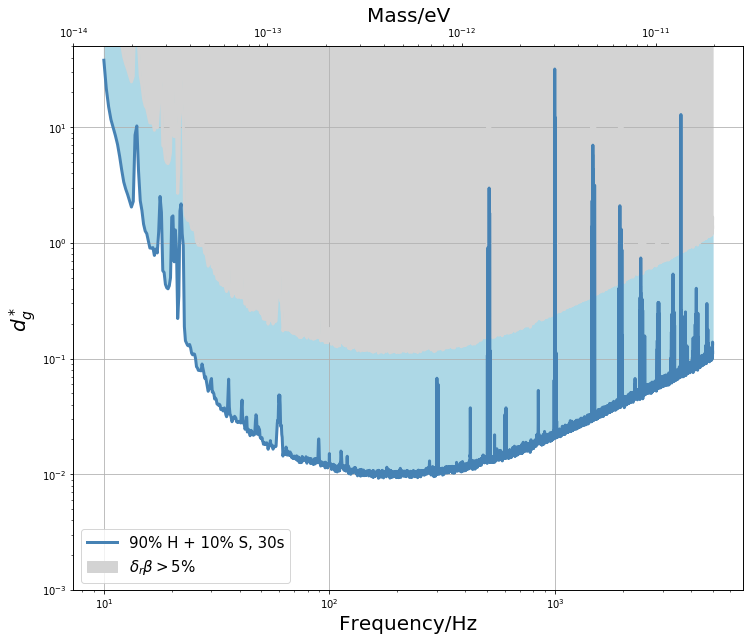

In [67]:
fig, ax = plt.subplots(nrows=1,ncols=1, figsize=(12,10))

ax.plot(f[::step],dg_approx[1], linewidth=3.0, color = "lightgray")
ax.plot(f[::step],limit_LHO_30, label='90% H + 10% S, 30s', linewidth=3.0, color = "steelblue")
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylim([0.001, 50])
ax.grid(True)
ax.set_xlabel("Frequency/Hz", fontsize = 20)
ax.set_ylabel(r"$d_g^*$", fontsize = 20)
ax.set_facecolor('1.0')


roof = [ 502 for i in f[::step]]
ax.fill_between(f[::step],dg_approx[1], roof, color="lightgray", label=r'$\delta_{r}\beta>5\%$' )
ax.fill_between(f[::step],limit_LHO_30, dg_approx[1],  color="lightblue" )



def f2m(f):
    r = 2*pi*f*h_bar
    return r

fn, fx = ax.get_xlim()
ax2 = ax.twiny()
ax2.set_xscale('log')
ax2.set_xlim(f2m(fn),f2m(fx))
new_tick_locations = [1e-14, 1e-13, 1e-12, 1e-11]
ax2.set_xticks(new_tick_locations)
ax2.set_xlabel("Mass/eV", fontsize = 20)
ax.legend(prop={'size': 15})
plt.savefig("./Plots/LHO_30s_basic.png")
plt.show()

## Confrontation with alternative method

Comparison between the constraints on $d_g^*$ obtained with the previous method and the less conservative ones obtained from <br><br>
$$
s = \dfrac{\left\langle m\right\rangle_{h=h_{**}}-\left\langle m\right\rangle_{h=0}}{\sigma}\geq 1.
$$

In [39]:
limit_LHO_30_alternative = constraint_alternative(years_of_observation, 30, LHO )

In [40]:
x = [1, 2]

datatext = open("dg_data.txt", "w+")
for e in range(len(limit_LHO_30)):
    datatext.write(f"{f[::step][e]}    {limit_LHO_30[e]}    {limit_LHO_30_alternative[e]}\n")
    
datatext.close()

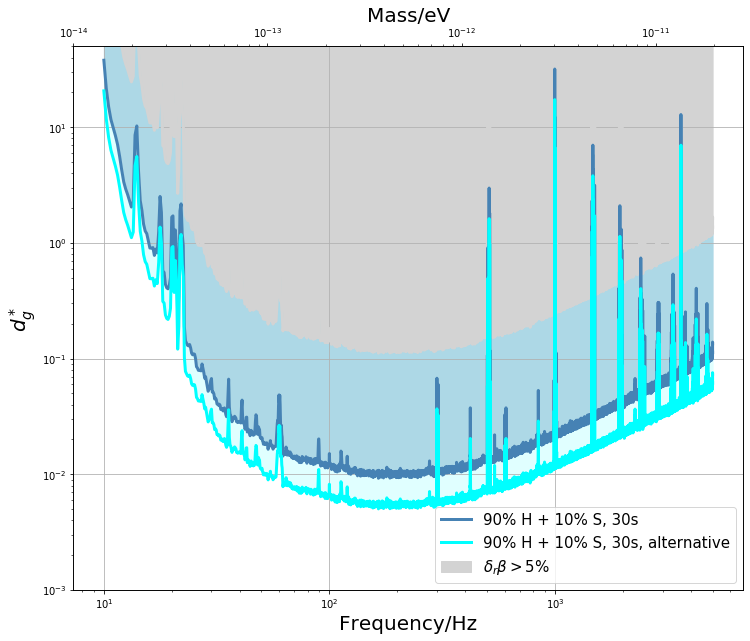

In [66]:
fig, ax = plt.subplots(nrows=1,ncols=1, figsize=(12,10))

ax.plot(f[::step],dg_approx[1], linewidth=3.0, color = "lightgray")
ax.plot(f[::step],limit_LHO_30, label='90% H + 10% S, 30s', linewidth=3.0, color = "steelblue")
ax.plot(f[::step],limit_LHO_30_alternative, label='90% H + 10% S, 30s, alternative', linewidth=3.0, color="cyan")
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylim([0.001, 50])
ax.grid(True)
ax.set_xlabel("Frequency/Hz", fontsize = 20)
ax.set_ylabel(r"$d_g^*$", fontsize = 20)
ax.set_facecolor('1.0')


roof = [ 502 for i in f[::step]]
ax.fill_between(f[::step],dg_approx[1], roof, color="lightgray", label=r'$\delta_{r}\beta>5\%$' )
ax.fill_between(f[::step],limit_LHO_30, dg_approx[1],  color="lightblue" )
ax.fill_between(f[::step],limit_LHO_30_alternative, limit_LHO_30,  color="lightcyan" )

def f2m(f):
    r = 2*pi*f*h_bar
    return r

fn, fx = ax.get_xlim()
ax2 = ax.twiny()
ax2.set_xscale('log')
ax2.set_xlim(f2m(fn),f2m(fx))
new_tick_locations = [1e-14, 1e-13, 1e-12, 1e-11]
ax2.set_xticks(new_tick_locations)
ax2.set_xlabel("Mass/eV", fontsize = 20)
ax.legend(prop={'size': 15})
plt.savefig("./Plots/StandardvsAlternative.png")
plt.show()

In [42]:
# PARAMETER MODIFICATION
rho_phi_mod = 3/5*rho_phi
rho_h = 1.0*rho_phi_mod
rho_s = 0.0*rho_phi_mod

#---------------------------------------------------------------------------------------------------------
limit_LHO_30_mod_halo_only = constraint(1, 30, LHO )
limit_LHO_30_mod_alternative = constraint_alternative(1, 30, LHO )
#---------------------------------------------------------------------------------------------------------

# PARAMETER MODIFICATION
rho_h = 0.9*rho_phi_mod
rho_s = 0.1*rho_phi_mod

#---------------------------------------------------------------------------------------------------------
limit_LHO_30_mod_stream = constraint(1, 30, LHO )
#---------------------------------------------------------------------------------------------------------

# PARAMETER RESET 
rho_h = 0.9*rho_phi
rho_s = 0.1*rho_phi

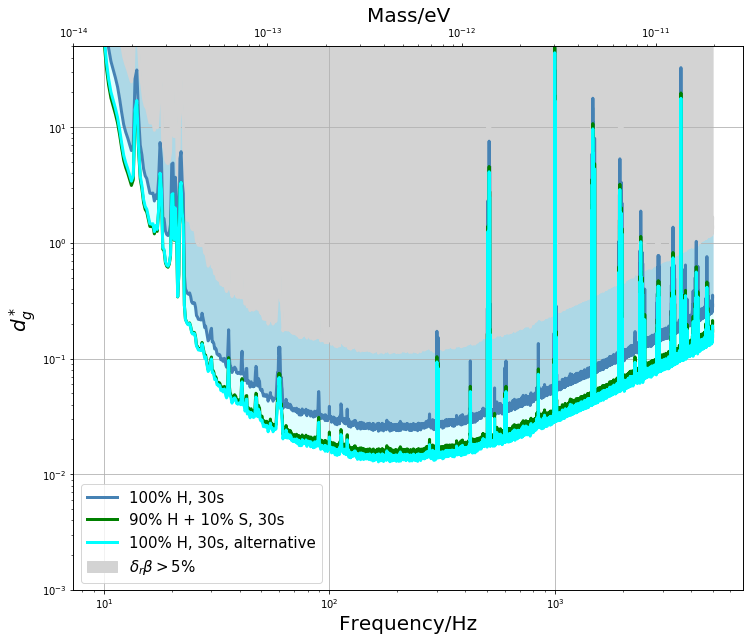

In [78]:
fig, ax = plt.subplots(nrows=1,ncols=1, figsize=(12,10))

ax.plot(f[::step],dg_approx[1], linewidth=3.0, color = "lightgray")
ax.plot(f[::step],limit_LHO_30_mod_halo_only, label='100% H, 30s', linewidth=3.0, color = "steelblue")
ax.plot(f[::step],limit_LHO_30_mod_stream, label='90% H + 10% S, 30s', linewidth=3.0, color = "green")
ax.plot(f[::step],limit_LHO_30_mod_alternative, label='100% H, 30s, alternative', linewidth=3.0, color="cyan")
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylim([0.001, 50])
ax.grid(True)
ax.set_xlabel("Frequency/Hz", fontsize = 20)
ax.set_ylabel(r"$d_g^*$", fontsize = 20)
ax.set_facecolor('1.0')


roof = [ 506 for i in f[::step]]
ax.fill_between(f[::step],dg_approx[1], roof, color="lightgray", label=r'$\delta_{r}\beta>5\%$'  )
ax.fill_between(f[::step],limit_LHO_30_mod_halo_only, dg_approx[1],  color="lightblue" )
ax.fill_between(f[::step],limit_LHO_30_mod_alternative, limit_LHO_30_mod_halo_only,  color="lightcyan" )

def f2m(f):
    r = 2*pi*f*h_bar
    return r

fn, fx = ax.get_xlim()
ax2 = ax.twiny()
ax2.set_xscale('log')
ax2.set_xlim(f2m(fn),f2m(fx))
new_tick_locations = [1e-14, 1e-13, 1e-12, 1e-11]
ax2.set_xticks(new_tick_locations)
ax2.set_xlabel("Mass/eV", fontsize = 20)
ax.legend(prop={'size': 15})
plt.savefig("./Plots/StandardvsAlternative.png")
plt.show()

## Alternative method with/without stream

We compare the constraint curves obtained for the alternative method in the two scenario <br>

$$
\rho_h = \rho_{\phi}, \qquad \rho_{s} = 0
$$

and

$$
\rho_h = 0.9\rho_{\phi}, \qquad \rho_{s} = 0.1\rho_{\phi}.
$$

In [44]:
# PARAMETER MODIFICATION

rho_h = 1.0*rho_phi
rho_s = 0.0*rho_phi

#---------------------------------------------------------------------------------------------------------
limit_LHO_30_alternative_H_only = constraint_alternative(years_of_observation, 30, LHO )
#---------------------------------------------------------------------------------------------------------

# PARAMETER RESET 
rho_h = 0.9*rho_phi
rho_s = 0.1*rho_phi

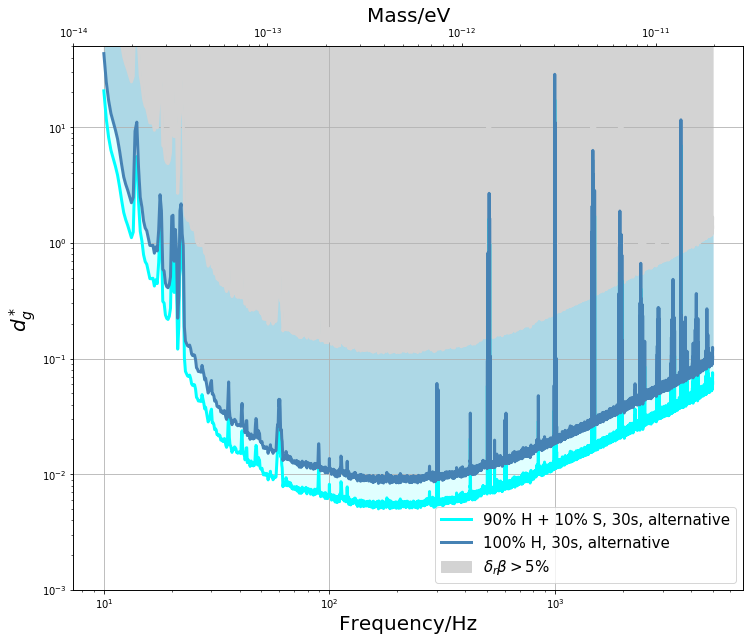

In [77]:
fig, ax = plt.subplots(nrows=1,ncols=1, figsize=(12,10))

ax.plot(f[::step],dg_approx[1], linewidth=3.0, color = "lightgray")
ax.plot(f[::step],limit_LHO_30_alternative, label='90% H + 10% S, 30s, alternative', linewidth=3.0, color = "cyan")
ax.plot(f[::step],limit_LHO_30_alternative_H_only, label='100% H, 30s, alternative', linewidth=3.0, color = "steelblue")

ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylim([0.001, 50])
ax.grid(True)
ax.set_xlabel("Frequency/Hz", fontsize = 20)
ax.set_ylabel(r"$d_g^*$", fontsize = 20)
ax.set_facecolor('1.0')


roof = [ 502 for i in f[::step]]
ax.fill_between(f[::step],dg_approx[1], roof, color="lightgray", label=r'$\delta_{r}\beta>5\%$'  )
ax.fill_between(f[::step],limit_LHO_30_alternative_H_only, dg_approx[1],  color="lightblue" )
ax.fill_between(f[::step],limit_LHO_30_alternative, limit_LHO_30_alternative_H_only,  color="lightcyan" )


def f2m(f):
    r = 2*pi*f*h_bar
    return r

fn, fx = ax.get_xlim()
ax2 = ax.twiny()
ax2.set_xscale('log')
ax2.set_xlim(f2m(fn),f2m(fx))
new_tick_locations = [1e-14, 1e-13, 1e-12, 1e-11]
ax2.set_xticks(new_tick_locations)
ax2.set_xlabel("Mass/eV", fontsize = 20)
ax.legend(prop={'size': 15})

plt.show()

## Halo vs Stream

We confront the constraint curves for the parameter $d_g^*$ considering the halo and the stream contribution separately.

In [46]:
# PARAMETERS MODIFICATION

rho_h = 0.9*rho_phi
rho_s = 0.0*rho_phi
limit_LHO_30_H_only = constraint(years_of_observation, 30, LHO )
#---------------------------------------------------------------------------------------------------------
rho_h = 0.0*rho_phi
rho_s = 0.1*rho_phi
limit_LHO_30_S_only = constraint(years_of_observation, 30, LHO )
#---------------------------------------------------------------------------------------------------------

# PARAMETER RESET

rho_h = 0.9*rho_phi
rho_s = 0.1*rho_phi

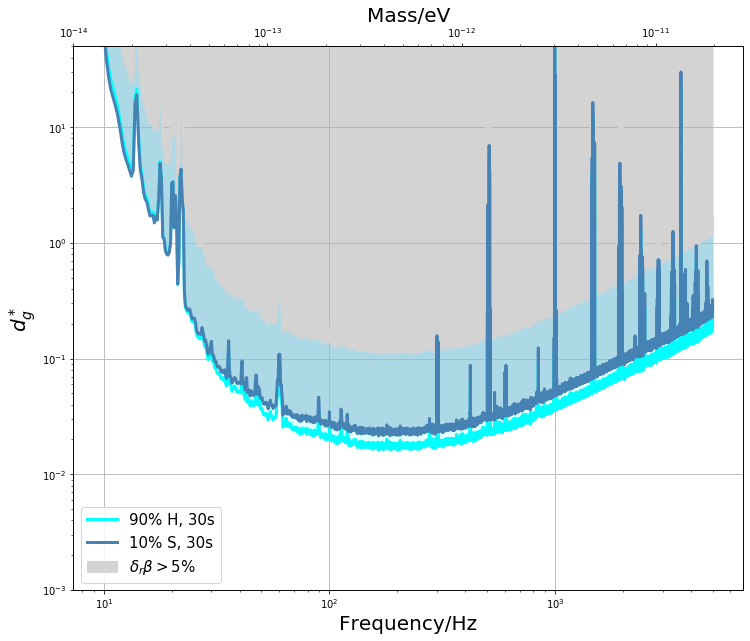

In [76]:
fig, ax = plt.subplots(nrows=1,ncols=1, figsize=(12,10))

ax.plot(f[::step],dg_approx[1], linewidth=3.0, color = "lightgray")
ax.plot(f[::step],limit_LHO_30_H_only, label='90% H, 30s', linewidth=3.0, color = "cyan")
ax.plot(f[::step],limit_LHO_30_S_only, label='10% S, 30s', linewidth=3.0, color = "steelblue")

ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylim([0.001, 50])
ax.grid(True)
ax.set_xlabel("Frequency/Hz", fontsize = 20)
ax.set_ylabel(r"$d_g^*$", fontsize = 20)
ax.set_facecolor('1.0')


roof = [ 502 for i in f[::step]]
ax.fill_between(f[::step],dg_approx[1], roof, color="lightgray", label=r'$\delta_{r}\beta>5\%$'  )
ax.fill_between(f[::step],limit_LHO_30_S_only, dg_approx[1],  color="lightblue" )
ax.fill_between(f[::step],limit_LHO_30_S_only, limit_LHO_30_H_only,  color="lightcyan" )


def f2m(f):
    r = 2*pi*f*h_bar
    return r

fn, fx = ax.get_xlim()
ax2 = ax.twiny()
ax2.set_xscale('log')
ax2.set_xlim(f2m(fn),f2m(fx))
new_tick_locations = [1e-14, 1e-13, 1e-12, 1e-11]
ax2.set_xticks(new_tick_locations)
ax2.set_xlabel("Mass/eV", fontsize = 20)
ax.legend(prop={'size': 15})
plt.savefig("./Plots/LHO_SvsH.png")
plt.show()

## $h_1$ vs $h_2$

We confront how much $h_1$ and $h_2$ contribute to the final constraint curve. We also plot how this contribution are divived between the DM present in the halo and the DM belonging to the stream. 

In [48]:
# PARAMETERS MODIFICATION

f_1 = 1
f_2 = 0
#---------------------------------------------------------------------------------------------------------
limit_LHO_30_T1_only = constraint(years_of_observation, 30, LHO )
dg_approx_T1_only = [[(ep*values[1])/(sqrt(30)*sqrt(h_bar_squared(values[0], LHO)))for values in temp[::step]] for ep in epsilon_small]
#---------------------------------------------------------------------------------------------------------
rho_h = 0.9*rho_phi
rho_s = 0.0*rho_phi
limit_LHO_30_T1H_only = constraint(years_of_observation, 30, LHO )
dg_approx_T1H_only = [[(ep*values[1])/(sqrt(30)*sqrt(h_bar_squared(values[0], LHO)))for values in temp[::step]] for ep in epsilon_small]
#---------------------------------------------------------------------------------------------------------
rho_h = 0.0*rho_phi
rho_s = 0.1*rho_phi
limit_LHO_30_T1S_only = constraint(years_of_observation, 30, LHO )
dg_approx_T1S_only = [[(ep*values[1])/(sqrt(30)*sqrt(h_bar_squared(values[0], LHO)))for values in temp[::step]] for ep in epsilon_small]
#---------------------------------------------------------------------------------------------------------
f_1 = 0
f_2 = 1
#---------------------------------------------------------------------------------------------------------
rho_h = 0.9*rho_phi
rho_s = 0.1*rho_phi
limit_LHO_30_T2_only = constraint(years_of_observation, 30, LHO )
dg_approx_T2_only = [[(ep*values[1])/(sqrt(30)*sqrt(h_bar_squared(values[0], LHO)))for values in temp[::step]] for ep in epsilon_small]
#---------------------------------------------------------------------------------------------------------
rho_h = 0.9*rho_phi
rho_s = 0.0*rho_phi
limit_LHO_30_T2H_only = constraint(years_of_observation, 30, LHO )
dg_approx_T2H_only = [[(ep*values[1])/(sqrt(30)*sqrt(h_bar_squared(values[0], LHO)))for values in temp[::step]] for ep in epsilon_small]
#---------------------------------------------------------------------------------------------------------
rho_h = 0.0*rho_phi
rho_s = 0.1*rho_phi
limit_LHO_30_T2S_only = constraint(years_of_observation, 30, LHO )
dg_approx_T2S_only = [[(ep*values[1])/(sqrt(30)*sqrt(h_bar_squared(values[0], LHO)))for values in temp[::step]] for ep in epsilon_small]
#---------------------------------------------------------------------------------------------------------

# PARAMETERS RESET

f_1 = 1
f_2 = 1
rho_h = 0.9*rho_phi
rho_s = 0.1*rho_phi

In [75]:
#i = 0
#while (limit_LHO_30_T1_only[i]-dg_approx_T2_only[1][i]<0):
#    i = i +1
    
#print(i)

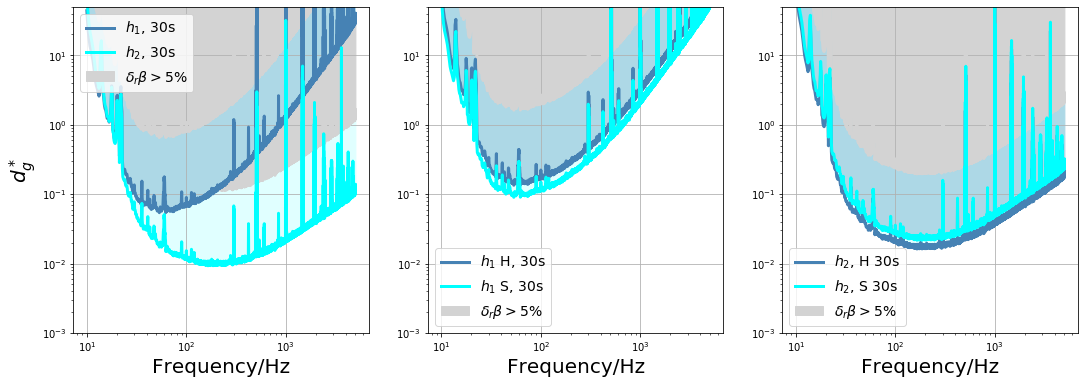

In [74]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize = (18, 6))

ax1.plot(f[::step],dg_approx_T1_only[1], linewidth=3.0, color = "lightgray")
ax1.plot(f[786::step],dg_approx_T2_only[1][786::step], linewidth=3.0, color = "lightgray")
ax1.plot(f[::step],limit_LHO_30_T1_only, label=r'$h_1$, 30s', linewidth=3.0, color = "steelblue")
ax1.plot(f[::step],limit_LHO_30_T2_only, label=r'$h_2$, 30s', linewidth=3.0, color = "cyan")

ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_ylim([0.001, 50])
ax1.grid(True)
ax1.set_xlabel("Frequency/Hz", fontsize = 20)
ax1.set_ylabel(r"$d_g^*$", fontsize = 20)
ax1.set_facecolor('1.0')


roof = [ 525 for i in f[::step]]
ax1.fill_between(f[::step],dg_approx_T1_only[1], roof, color="lightgray", label=r'$\delta_{r}\beta>5\%$'  )
ax1.fill_between(f[786::step],dg_approx_T2_only[1][786::step], limit_LHO_30_T1_only[786::step],  color="lightgray" )
ax1.fill_between(f[::step],limit_LHO_30_T1_only, dg_approx_T1_only[1],  color="lightblue" )
ax1.fill_between(f[:786:step],limit_LHO_30_T1_only[:786:step], limit_LHO_30_T2_only[:786:step],  color="lightcyan" )
ax1.fill_between(f[786::step],dg_approx_T2_only[1][786::step], limit_LHO_30_T2_only[786::step],  color="lightcyan" )
ax1.legend(prop={'size': 14})


ax2.plot(f[::step],dg_approx_T1H_only[1], linewidth=3.0, color = "lightgray")
ax2.plot(f[::step],limit_LHO_30_T1H_only, label=r'$h_1$ H, 30s', linewidth=3.0, color = "steelblue")
ax2.plot(f[::step],limit_LHO_30_T1S_only, label=r'$h_1$ S, 30s', linewidth=3.0, color = "cyan")

ax2.set_xscale('log')
ax2.set_yscale('log')
ax2.set_ylim([0.001, 50])
ax2.grid(True)
ax2.set_xlabel("Frequency/Hz", fontsize = 20)
#ax2.set_ylabel(r"$d_g^*$", fontsize = 20)
ax2.set_facecolor('1.0')

#ax2.label_outer()

roof = [ 525 for i in f[::step]]
ax2.fill_between(f[::step],dg_approx_T1H_only[1], roof, color="lightgray", label=r'$\delta_{r}\beta>5\%$'  )
ax2.fill_between(f[::step],limit_LHO_30_T1H_only, dg_approx_T1H_only[1],  color="lightblue" )
ax2.fill_between(f[::step],limit_LHO_30_T1H_only, limit_LHO_30_T1S_only,  color="lightcyan" )
ax2.legend(prop={'size': 14})
ax3.plot(f[::step],dg_approx_T2H_only[1], linewidth=3.0, color = "lightgray")
ax3.plot(f[::step],limit_LHO_30_T2H_only, label=r'$h_2$, H 30s', linewidth=3.0, color = "steelblue")
ax3.plot(f[::step],limit_LHO_30_T2S_only, label=r'$h_2$, S 30s', linewidth=3.0, color = "cyan")

ax3.set_xscale('log')
ax3.set_yscale('log')
ax3.set_ylim([0.001, 50])
ax3.grid(True)
ax3.set_xlabel("Frequency/Hz", fontsize = 20)
#ax3.set_ylabel(r"$d_g^*$", fontsize = 20)
ax3.set_facecolor('1.0')

#ax3.label_outer()

roof = [ 525 for i in f[::step]]
ax3.fill_between(f[::step],dg_approx_T2H_only[1], roof, color="lightgray", label=r'$\delta_{r}\beta>5\%$'  )
ax3.fill_between(f[::step],limit_LHO_30_T2S_only, dg_approx_T2H_only[1],  color="lightblue" )
ax3.fill_between(f[::step],limit_LHO_30_T2S_only, limit_LHO_30_T2H_only,  color="lightcyan" )
ax3.legend(prop={'size': 14})
plt.savefig("./Plots/LHO_h1vsh2.png")
plt.show()

## Stream-Halo ratio

We plot the different constraint curves obtained for different local dark matter compositions.

In [51]:
# PARAMETERS MODIFICATION

rho_h = 1.0*rho_phi
rho_s = 0.0*rho_phi
limit_LHO_30_S0_only = constraint(years_of_observation, 30, LHO )
#---------------------------------------------------------------------------------------------------------
rho_h = 0.95*rho_phi
rho_s = 0.05*rho_phi
limit_LHO_30_S5_only = constraint(years_of_observation, 30, LHO )
#---------------------------------------------------------------------------------------------------------
rho_h = 0.9*rho_phi
rho_s = 0.1*rho_phi
limit_LHO_30_S10_only = constraint(years_of_observation, 30, LHO )
#---------------------------------------------------------------------------------------------------------
rho_h = 0.85*rho_phi
rho_s = 0.15*rho_phi
limit_LHO_30_S15_only = constraint(years_of_observation, 30, LHO )
#---------------------------------------------------------------------------------------------------------
rho_h = 0.8*rho_phi
rho_s = 0.2*rho_phi
limit_LHO_30_S20_only = constraint(years_of_observation, 30, LHO )
#---------------------------------------------------------------------------------------------------------

# PARAMETERS RESET

rho_h = 0.9*rho_phi
rho_s = 0.1*rho_phi

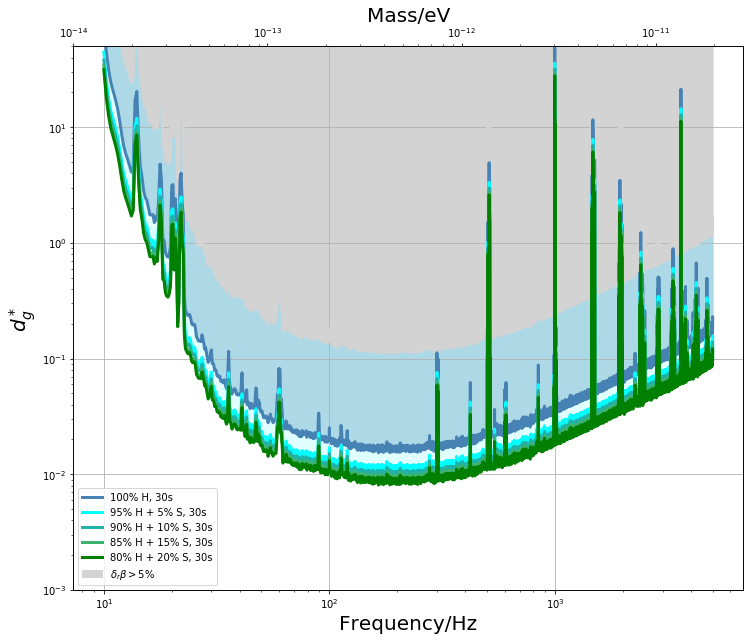

In [71]:
fig, ax = plt.subplots(nrows=1,ncols=1, figsize=(12,10))
ax.plot(f[::step],dg_approx[1], linewidth=3.0, color = "lightgray")
ax.plot(f[::step],limit_LHO_30_S0_only, label='100% H, 30s', linewidth=3.0, color = "steelblue")
ax.plot(f[::step],limit_LHO_30_S5_only, label='95% H + 5% S, 30s', linewidth=3.0, color = "cyan")
ax.plot(f[::step],limit_LHO_30_S10_only, label='90% H + 10% S, 30s', linewidth=3.0, color = "lightseagreen")
ax.plot(f[::step],limit_LHO_30_S15_only, label='85% H + 15% S, 30s', linewidth=3.0, color = "mediumseagreen")
ax.plot(f[::step],limit_LHO_30_S20_only, label='80% H + 20% S, 30s', linewidth=3.0, color = "green")

ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylim([0.001, 50])
ax.grid(True)
ax.set_xlabel("Frequency/Hz", fontsize = 20)
ax.set_ylabel(r"$d_g^*$", fontsize = 20)
ax.set_facecolor('1.0')
ax.legend(prop={'size': 10})

roof = [ 500 for i in f[::step]]
ax.fill_between(f[::step],dg_approx[1], roof, color="lightgray", label=r'$\delta_{r}\beta>5\%$'  )
ax.fill_between(f[::step],limit_LHO_30_S0_only, dg_approx[1],  color="lightblue" )
ax.fill_between(f[::step],limit_LHO_30_S0_only, limit_LHO_30_S5_only,  color="lightcyan" )
ax.fill_between(f[::step],limit_LHO_30_S5_only, limit_LHO_30_S10_only,  color="turquoise" )


def f2m(f):
    r = 2*pi*f*h_bar
    return r

fn, fx = ax.get_xlim()
ax2 = ax.twiny()
ax2.set_xscale('log')
ax2.set_xlim(f2m(fn),f2m(fx))
new_tick_locations = [1e-14, 1e-13, 1e-12, 1e-11]
ax2.set_xticks(new_tick_locations)
ax2.set_xlabel("Mass/eV", fontsize = 20)
ax.legend(prop={'size': 10})
plt.savefig("./Plots/LHO_stream_persentage.png")
plt.show()

## Single search time variation

We confront the different constraint curves obtained for different choices of the argument $search\_time$.

In [53]:
# PARAMETER MODIFICATION

limit_LHO_900 = constraint(years_of_observation, 900, LHO )
limit_LHO_10000 = constraint(years_of_observation, 10000, LHO )

min_30, min_30_index  = min(limit_LHO_30), limit_LHO_30.index(min(limit_LHO_30))
min_900, min_900_index  = min(limit_LHO_900), limit_LHO_900.index(min(limit_LHO_900))
min_10000, min_10000_index  = min(limit_LHO_10000), limit_LHO_10000.index(min(limit_LHO_10000))

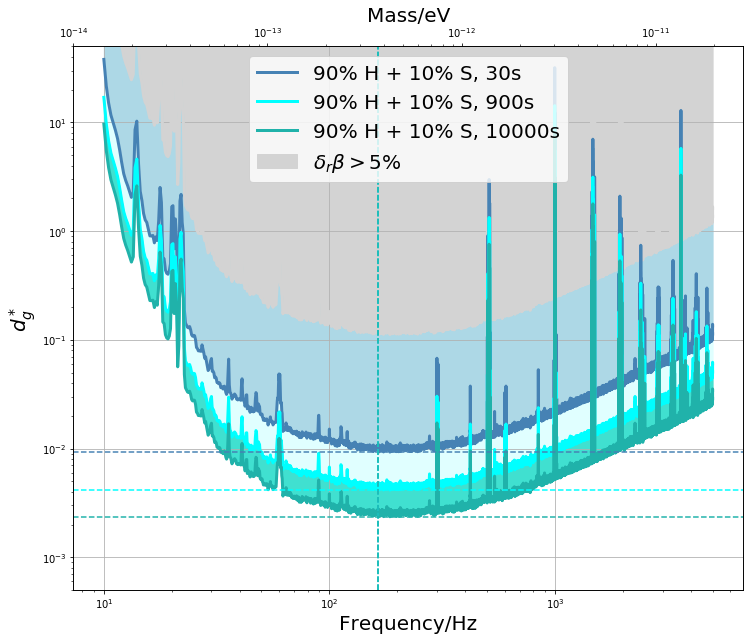

In [70]:
fig, ax = plt.subplots(nrows=1,ncols=1, figsize=(12,10))
ax.plot(f[::step],dg_approx[1], linewidth=3.0, color = "lightgray")
ax.plot(f[::step],limit_LHO_30, label='90% H + 10% S, 30s', linewidth=3.0, color = "steelblue" )
ax.plot(f[::step],limit_LHO_900, label='90% H + 10% S, 900s', linewidth=3.0, color = "cyan")
ax.plot(f[::step],limit_LHO_10000, label='90% H + 10% S, 10000s', linewidth=3.0, color = "lightseagreen")
ax.axvline(x=f[min_30_index*step], color ="steelblue", linestyle = "--")
ax.axhline(y=min_30, color ="steelblue", linestyle = "--")
ax.axvline(x=f[min_900_index*step], color ="cyan", linestyle = "--")
ax.axhline(y=min_900, color ="cyan", linestyle = "--")
ax.axvline(x=f[min_10000_index*step], color ="lightseagreen", linestyle = "--")
ax.axhline(y=min_10000, color ="lightseagreen", linestyle = "--")


ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylim([0.0005, 50])
ax.grid(True)
ax.set_xlabel("Frequency/Hz", fontsize = 20)
ax.set_ylabel(r"$d_g^*$", fontsize = 20)
ax.set_facecolor('1.0')
ax.legend(prop={'size': 20})

roof = [ 502 for i in f[::step]]
ax.fill_between(f[::step],dg_approx[1], roof, color="lightgray", label=r'$\delta_{r}\beta>5\%$'  )
ax.fill_between(f[::step],limit_LHO_30, dg_approx[1],  color="lightblue" )
ax.fill_between(f[::step],limit_LHO_30, limit_LHO_900,  color="lightcyan" )
ax.fill_between(f[::step],limit_LHO_900, limit_LHO_10000,  color="turquoise" )

def f2m(f):
    r = 2*pi*f*h_bar
    return r

fn, fx = ax.get_xlim()
ax2 = ax.twiny()
ax2.set_xscale('log')
ax2.set_xlim(f2m(fn),f2m(fx))
new_tick_locations = [1e-14, 1e-13, 1e-12, 1e-11]
ax2.set_xticks(new_tick_locations)
ax2.set_xlabel("Mass/eV", fontsize = 20)
ax.legend(prop={'size': 20})
plt.savefig("./Plots/LHO_different_st.png")
plt.show()

We track the minimum of the constraint curve for different values of the argument $search\_time$.

In [55]:
time_support = [30, 300, 900, 1500, 4500, 9000, 12000]
con_min = [constraint_min_local(years_of_observation, t, LHO, 250) for t in time_support]

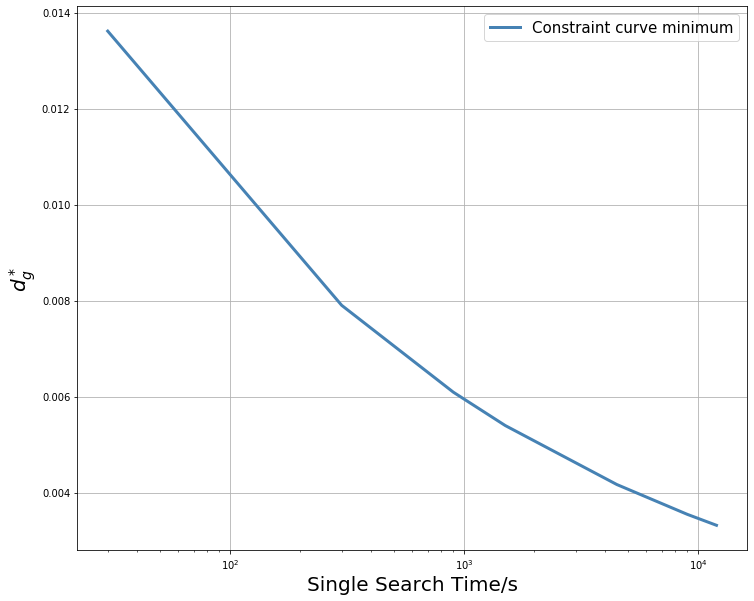

In [56]:
fig, ax = plt.subplots(nrows=1,ncols=1, figsize=(12,10))

ax.plot(time_support,con_min, label='Constraint curve minimum', linewidth=3.0, color = "steelblue")
ax.set_xscale('log')
#ax.set_yscale('log')
ax.grid(True)
ax.set_xlabel("Single Search Time/s", fontsize = 20)
ax.set_ylabel(r"$d_g^*$", fontsize = 20)
ax.set_facecolor('1.0')
ax.legend(prop={'size': 15})


plt.savefig("./Plots/dg_minimum_curve.png")
plt.show()

## Geometrical factors

We plot the factors $G_1$ and $G_2$ together with thier values averaged on the daily diurnal Earth rotation.

In [57]:
# PARAMETERS MODIFICATION

time_support = [i*T_e/100 for i in range(100)]
time_support_scaled = [i*1/100 for i in range(100)]
G1_plot = [G1(time, LHO) for time in time_support]
G1_plot_mean = [G1_mean(LHO) for time in time_support]
G2_plot = [G2(time, LHO) for time in time_support]
G2_plot_mean = [G2_mean(LHO) for time in time_support]

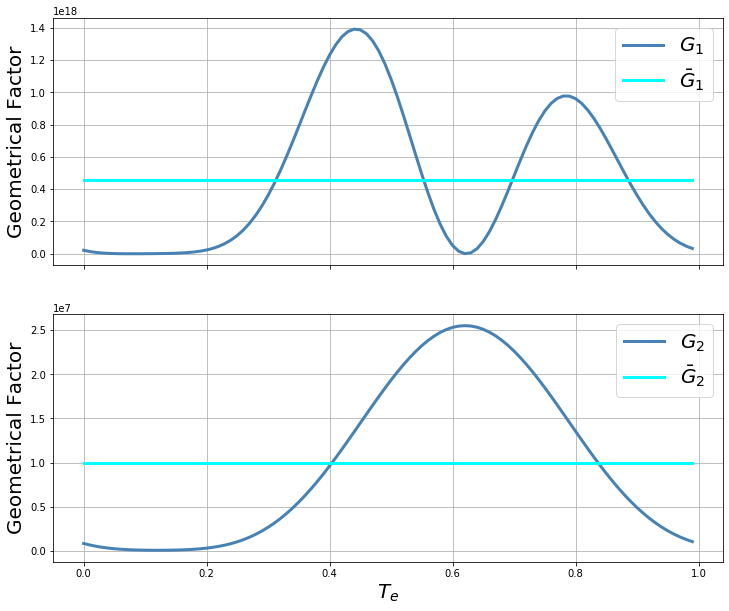

In [58]:
fig, (ax1, ax2) = plt.subplots(2, figsize = (12, 10))

ax1.plot(time_support_scaled,G1_plot, label=r'$G_1$', linewidth=3.0, color = "steelblue")
ax1.plot(time_support_scaled,G1_plot_mean, label=r'$\bar{G}_1$', linewidth=3.0, color = "cyan")
ax1.grid(True)
ax1.set_xlabel(r"$T_{e}$", fontsize = 20)
ax1.set_ylabel('Geometrical Factor', fontsize = 20)
ax1.label_outer()
ax1.set_facecolor('1.0')
ax1.legend(prop={'size': 20})

ax2.plot(time_support_scaled,G2_plot, label=r'$G_2$', linewidth=3.0, color = "steelblue")
ax2.plot(time_support_scaled,G2_plot_mean, label=r'$\bar{G}_2$', linewidth=3.0, color = "cyan")
ax2.grid(True)
ax2.set_xlabel(r"$T_{e}$", fontsize = 20)
ax2.set_ylabel('Geometrical Factor', fontsize = 20)

ax2.set_facecolor('1.0')
ax2.legend(prop={'size': 20})

plt.savefig("./Plots/T_1&T_2.png")


plt.show()

## Signal amplitude

We confront the signal amplitudes $h_1$ and $h_2$ for different frequencies.

In [59]:
# PARAMETER MODIFICATION

time_support = [i*T_e/100 for i in range(100)]
time_support_scaled = [i*1/100 for i in range(100)]
k = 8*pi*G/(c**6)
G1_plot_1 = [k*G1(time, LHO)/(2*pi*(1))**2 for time in time_support]
G1_plot_10 = [k*G1(time, LHO)/(2*pi*(10))**2 for time in time_support]
G1_plot_100 = [k*G1(time, LHO)/(2*pi*(100))**2 for time in time_support]
G2_plot = [k*0.25*G2(time, LHO)*(LHO.L**2) for time in time_support]

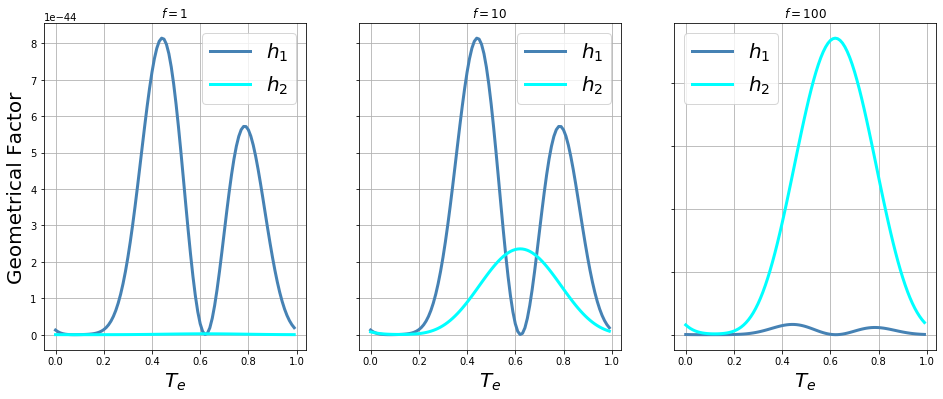

In [60]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize = (16, 6))


ax1.title.set_text(r'$f = 1$')
ax1.plot(time_support_scaled,G1_plot_1, label=r'$h_1$', linewidth=3.0, color = "steelblue")
ax1.plot(time_support_scaled,G2_plot, label=r'$h_2$', linewidth=3.0, color = "cyan")
ax1.grid(True)
ax1.set_xlabel(r"$T_{e}$", fontsize = 20)
ax1.set_ylabel('Geometrical Factor', fontsize = 20)
ax1.set_facecolor('1.0')
ax1.legend(prop={'size': 20})


ax2.title.set_text(r'$f = 10$')
ax2.plot(time_support_scaled,G1_plot_10, label=r'$h_1$', linewidth=3.0, color = "steelblue")
ax2.plot(time_support_scaled,G2_plot, label=r'$h_2$', linewidth=3.0, color = "cyan")
ax2.grid(True)
ax2.set_xlabel(r"$T_{e}$", fontsize = 20)
ax2.set_ylabel('Signal amplitude', fontsize = 20)
ax2.label_outer()
ax2.set_facecolor('1.0')
ax2.legend(prop={'size': 20})

ax3.title.set_text(r'$f = 100$')
ax3.plot(time_support_scaled,G1_plot_100, label=r'$h_1$', linewidth=3.0, color = "steelblue")
ax3.plot(time_support_scaled,G2_plot, label=r'$h_2$', linewidth=3.0, color = "cyan")
ax3.grid(True)
ax3.set_xlabel(r"$T_{e}$", fontsize = 20)
ax3.set_ylabel('Geometrical Factor', fontsize = 20)
ax3.label_outer()


ax3.set_facecolor('1.0')
ax3.legend(prop={'size': 20})

plt.savefig("./Plots/T_1vsT_2.png")


plt.show()